In [1]:
%reload_ext autoreload
%autoreload 2


In [2]:
# Data Manip
import numpy as np
import pandas as pd

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical analysis
from scipy.optimize import curve_fit

## 1. Chargement du dataset et 1ères Data explorations/ manipulations

In [3]:
shp = pd.read_csv("../raw\student_habits_performance.csv")

In [4]:
shp.shape

(1000, 16)

In [5]:
shp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [6]:
shp.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


In [7]:
shp.tail(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
990,S1990,18,Male,3.2,3.5,1.7,No,91.7,6.5,Good,1,Master,Good,5,No,63.6
991,S1991,20,Male,6.0,2.1,3.0,No,86.7,5.1,Good,2,High School,Good,3,No,85.3
992,S1992,18,Male,3.5,0.0,1.9,No,96.8,6.4,Fair,3,Bachelor,Poor,3,No,71.8
993,S1993,20,Male,3.8,2.1,1.0,No,89.0,5.2,Good,1,High School,Good,7,No,70.9
994,S1994,20,Female,1.6,1.3,2.9,No,75.3,5.6,Good,0,High School,Average,5,No,41.7
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,S1999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


### Exploration de la 1ère colonne:  Id

In [8]:
shp.student_id.nunique()

1000

In [9]:
shp.student_id.dtype

dtype('O')

In [10]:
shp.rename(columns={"student_id":"id"}, inplace=True)

In [11]:
shp["id"] = shp["id"].apply(lambda x:x[1:])

In [12]:
shp["id"] = shp["id"].apply(lambda x:int(x))

In [13]:
shp.id.dtype

dtype('int64')

### Exploration 2ème colonne: age

In [14]:
shp.age.nunique()

8

In [15]:
shp.age.unique()

array([23, 20, 21, 19, 24, 18, 22, 17])

Text(0.5, 1.0, 'Age of students repartition')

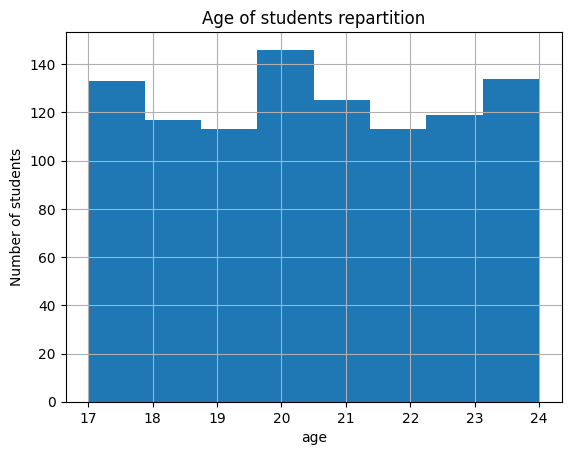

In [90]:
shp.age.hist(bins=8)
plt.xlabel("age")
plt.ylabel('Number of students')
plt.title("Age of students repartition")

In [17]:
shp.groupby("age").count().id/shp.shape[0]

age
17    0.133
18    0.117
19    0.113
20    0.146
21    0.125
22    0.113
23    0.119
24    0.134
Name: id, dtype: float64

### Exploration 3ème colonne: gender

In [18]:
shp.gender.nunique()

3

In [19]:
shp.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

Text(0.5, 1.0, 'students gender repartition')

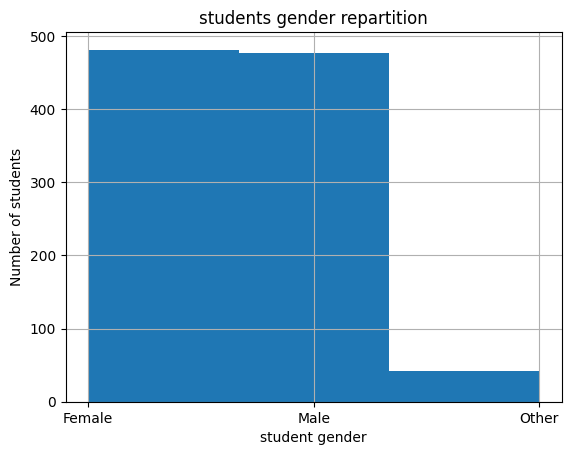

In [91]:
shp.gender.hist(bins=3)
plt.xlabel("student gender")
plt.ylabel('Number of students')
plt.title("students gender repartition")

Text(0.5, 1.0, 'students gender repartition')

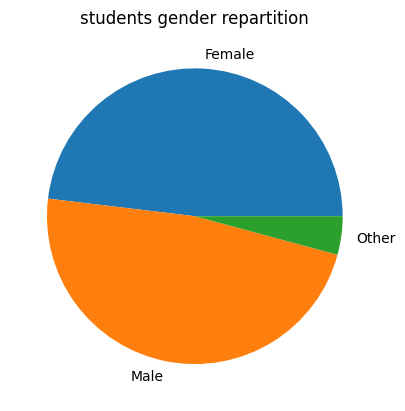

In [92]:
labels = 'Female', 'Male', 'Other'
sizes = [shp.groupby("gender").count().id.iloc[0], shp.groupby("gender").count().id.iloc[1], shp.groupby("gender").count().id.iloc[2]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.title("students gender repartition")

### Exploration 4ème colonne: study_hours_per_day

In [22]:
shp.study_hours_per_day.nunique()

78

<Axes: >

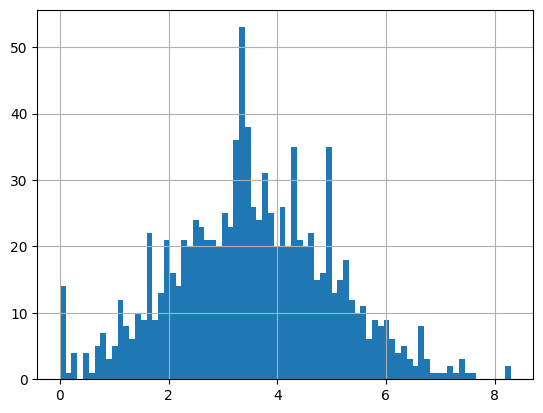

In [23]:
shp.study_hours_per_day.hist(bins=78)

In [24]:
#Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

In [25]:
hist = shp.groupby(by='study_hours_per_day').count()['id'].reset_index()

In [26]:
hist.head()

,study_hours_per_day,id
0,0.0,13
1,0.1,1
2,0.2,1
3,0.3,4
4,0.5,4


In [27]:
xdata = np.asarray(hist['study_hours_per_day'])
ydata = np.asarray(hist['id'])

parameters, covariance = curve_fit(Gauss, xdata, ydata)

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_9396\2566255575.py:3: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


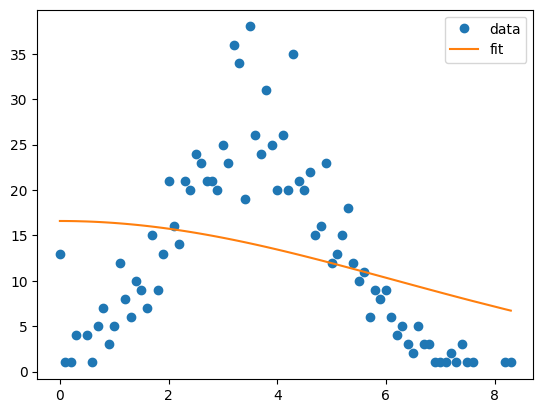

In [28]:
fit_A = parameters[0]
fit_B = parameters[1]

fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

### 5ème colonne: social_media_hours

In [29]:
shp.social_media_hours.nunique()

60

<Axes: >

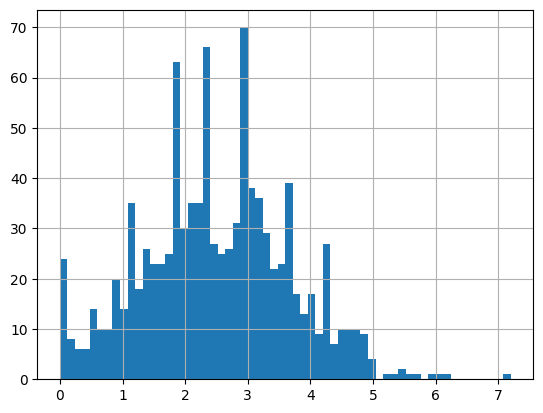

In [30]:
shp.social_media_hours.hist(bins=60)

<Axes: xlabel='social_media_hours', ylabel='id'>

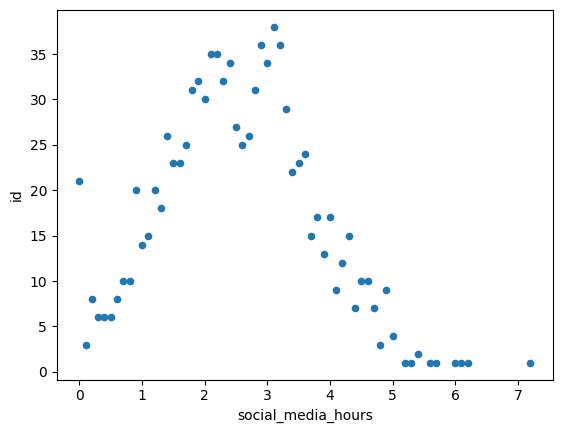

In [31]:
hist = shp.groupby(by='social_media_hours').count()['id'].reset_index()
hist.plot.scatter("social_media_hours","id")

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_9396\2566255575.py:3: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


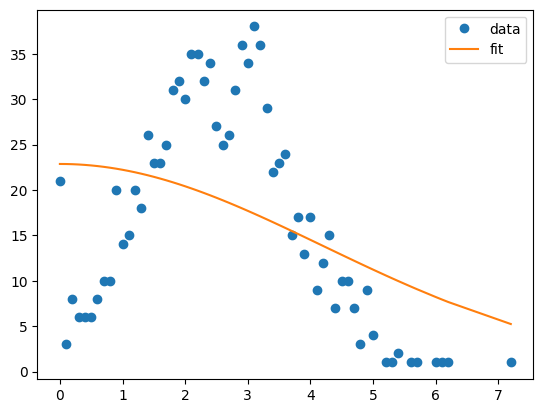

In [32]:
xdata = np.asarray(hist['social_media_hours'])
ydata = np.asarray(hist['id'])

parameters, covariance = curve_fit(Gauss, xdata, ydata)

fit_A = parameters[0]
fit_B = parameters[1]

fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

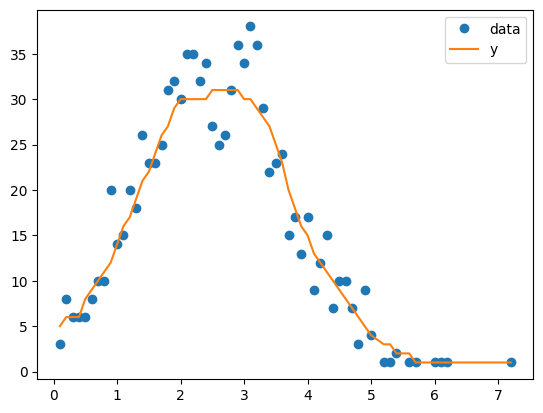

In [33]:
from scipy.ndimage import uniform_filter1d
N = 10
y = uniform_filter1d(ydata[1:], size=N)

plt.plot(xdata[1:], ydata[1:], 'o', label='data')
plt.plot(xdata[1:], y, '-', label='y')
plt.legend()

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_9396\2566255575.py:3: RuntimeWarning: overflow encountered in exp
  y = A*np.exp(-1*B*x**2)


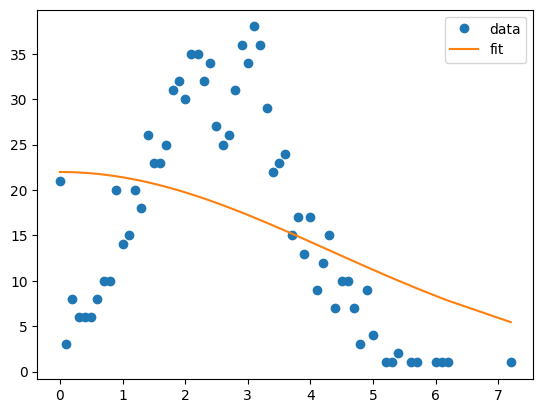

In [34]:
parameters, covariance = curve_fit(Gauss, xdata[1:], y)

fit_A = parameters[0]
fit_B = parameters[1]

fit_y = Gauss(xdata, fit_A,fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

### 6ème colonne: netflix_hours

In [35]:
shp.netflix_hours.head()

0    1.1
1    2.3
2    1.3
3    1.0
4    0.5
Name: netflix_hours, dtype: float64

In [36]:
shp.netflix_hours.nunique()

51

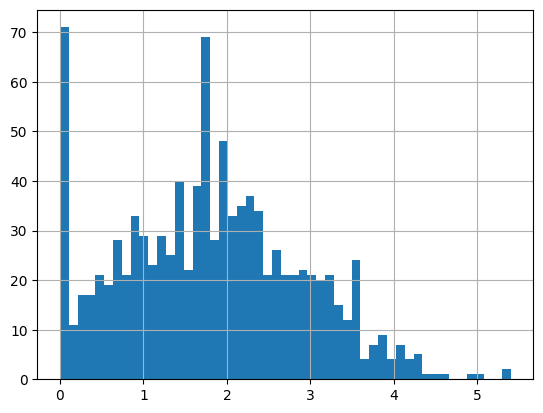

In [37]:
ax = shp.netflix_hours.hist(bins=51)

### 7ème colonne: part_time_job

In [38]:
shp.part_time_job.unique()

array(['No', 'Yes'], dtype=object)

([<matplotlib.patches.Wedge at 0x21769581cd0>,
 [Text(-0.8584734829732303, 0.68776687840562, 'No'),
  Text(0.8584737070760792, -0.687766598679417, 'Yes')])

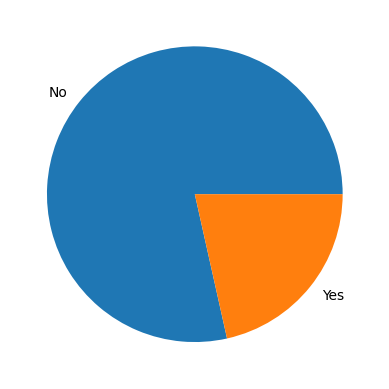

In [39]:
labels = 'No', 'Yes'
sizes = [shp.groupby("part_time_job").count().id.iloc[0], shp.groupby("part_time_job").count().id.iloc[1]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

### Colonne: exam_score

<Axes: >

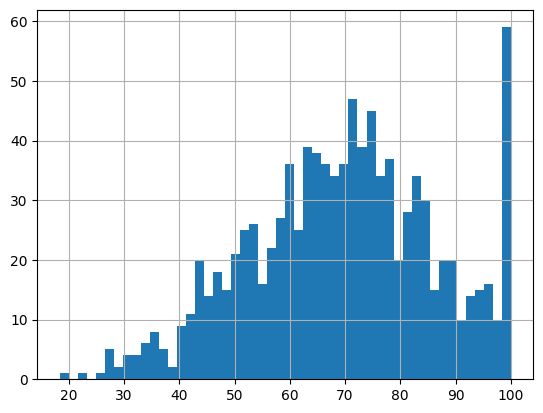

In [40]:
shp.exam_score.hist(bins=50)

### 12ème colonne: parental_education_level

In [41]:
print("Nombre de Nan:", len(shp.parental_education_level[shp.parental_education_level.isna()])/shp.shape[0]*100, "%")

Nombre de Nan: 9.1 %


In [42]:
shp.parental_education_level.nunique()

3

In [43]:
shp.parental_education_level.unique()

array(['Master', 'High School', 'Bachelor', nan], dtype=object)

<Axes: >

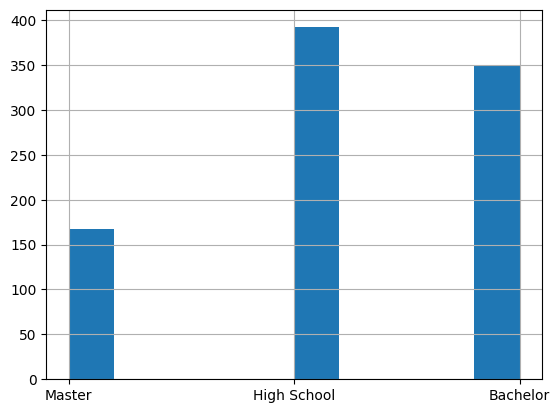

In [44]:
shp.parental_education_level.hist()

([<matplotlib.patches.Wedge at 0x21769538c90>,
 [Text(0.3886978041219171, 1.0290354790145966, 'Master'),
  Text(-0.887229336697393, -0.650249263054949, 'High School'),
  Text(0.9218122531029213, -0.6002184352627934, 'Bachelor')])

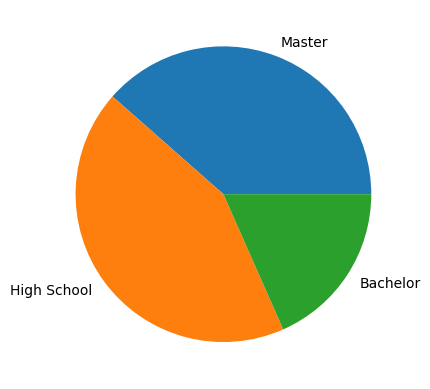

In [45]:
labels = 'Master', 'High School', 'Bachelor'
sizes = [shp.groupby("parental_education_level").count().id.iloc[0], shp.groupby("parental_education_level").count().id.iloc[1], shp.groupby("parental_education_level").count().id.iloc[2]]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [46]:
shp.parental_education_level.fillna("Unknown", inplace=True)

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_9396\3665930021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  shp.parental_education_level.fillna("Unknown", inplace=True)


In [47]:
shp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1000 non-null   int64  
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

### General visualization

In [48]:
shp.columns

Index(['id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'study_hours_per_day'}>,
        <Axes: title={'center': 'social_media_hours'}>],
       [<Axes: title={'center': 'netflix_hours'}>,
        <Axes: title={'center': 'attendance_percentage'}>,
        <Axes: title={'center': 'sleep_hours'}>],
       [<Axes: title={'center': 'exercise_frequency'}>,
        <Axes: title={'center': 'mental_health_rating'}>,
        <Axes: title={'center': 'exam_score'}>]], dtype=object)

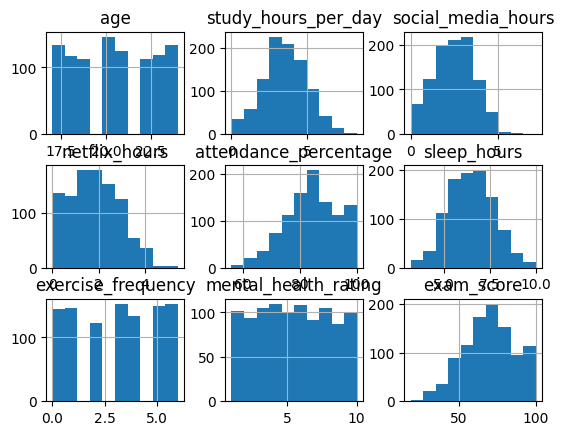

In [49]:

shp[['age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage',
       'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']].hist()

## 2. Analyses bivariées des variables catégorielles avec la target

In [50]:
shp.head()

,id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


### 2.1 gender

In [51]:
shp.loc[shp["gender"]=="Male"].exam_score.mean()

np.float64(69.36834381551363)

In [52]:
shp.loc[shp["gender"]=="Female"].exam_score.mean()

np.float64(69.74137214137215)

### 2.2 part_time_job

In [53]:
shp.part_time_job.unique()

array(['No', 'Yes'], dtype=object)

In [54]:
shp.loc[shp["part_time_job"]=="Yes"].exam_score.mean()

np.float64(68.74325581395348)

In [55]:
shp.loc[shp["part_time_job"]=="No"].exam_score.mean()

np.float64(69.83656050955413)

### 2.3 diet_quality

In [56]:
shp.diet_quality.unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

In [57]:
shp.loc[shp["diet_quality"]=="Fair"].exam_score.mean()

np.float64(70.42883295194508)

In [58]:
shp.loc[shp["diet_quality"]=="Good"].exam_score.mean()

np.float64(69.36640211640211)

In [59]:
shp.loc[shp["diet_quality"]=="Poor"].exam_score.mean()

np.float64(68.12756756756755)

### 2.4 parental_education_level

In [60]:
shp.parental_education_level.unique()

array(['Master', 'High School', 'Bachelor', 'Unknown'], dtype=object)

In [61]:
shp.loc[shp["parental_education_level"]=="Master"].exam_score.mean()

np.float64(68.08682634730539)

In [62]:
shp.loc[shp["parental_education_level"]=="Bachelor"].exam_score.mean()

np.float64(70.27257142857142)

In [63]:
shp.loc[shp["parental_education_level"]=="High School"].exam_score.mean()

np.float64(69.54719387755102)

In [64]:
shp.loc[shp["parental_education_level"]=="Unknown"].exam_score.mean()

np.float64(70.03406593406594)

### 2.5 internet_quality

In [65]:
shp.internet_quality.unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [66]:
shp.loc[shp["internet_quality"]=="Poor"].exam_score.mean()

np.float64(69.71728395061729)

In [67]:
shp.loc[shp["internet_quality"]=="Average"].exam_score.mean()

np.float64(70.64398976982098)

In [68]:
shp.loc[shp["internet_quality"]=="Good"].exam_score.mean()

np.float64(68.64765100671141)

## 3. Analyse bivariée des variables numériques avec la target

In [69]:
shp.columns

Index(['id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'part_time_job', 'attendance_percentage',
       'sleep_hours', 'diet_quality', 'exercise_frequency',
       'parental_education_level', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

### 3.1 Etude générale des corrélations entre variables (cible incluse)

In [70]:
shp_num = shp[['age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage',
       'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']]

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_9396\684244214.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


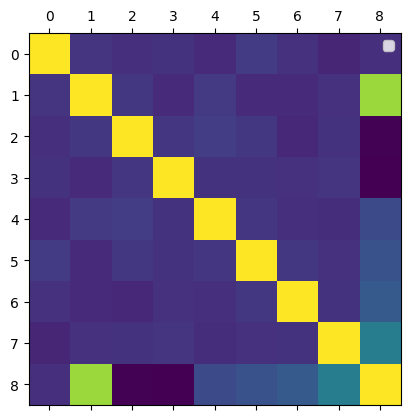

In [71]:
plt.matshow(shp_num.corr())
plt.legend()
plt.show()

#### La même chose avec Seaborn

<Axes: >

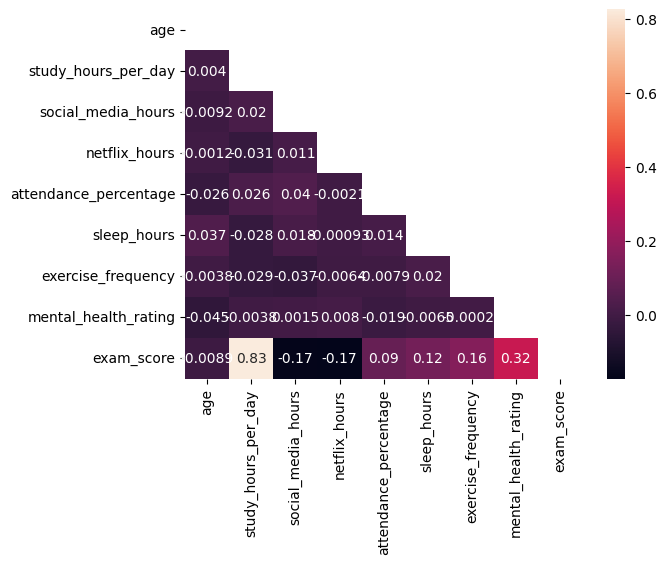

In [72]:
mask = np.triu(np.ones_like(shp_num.corr(), dtype=bool))
sns.heatmap(shp_num.corr(), mask=mask, annot=True)

#### Aucunes des variables ne montrent de corrélation significative entre elles. Les deux variables les plus corrélées avec la cible sont study_hours_per_day et mental_health_rating

### 3.2 mental_health_rating

In [73]:
shp.mental_health_rating.describe()

count    1000.000000
mean        5.438000
std         2.847501
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: mental_health_rating, dtype: float64

<Axes: ylabel='mental_health_rating'>

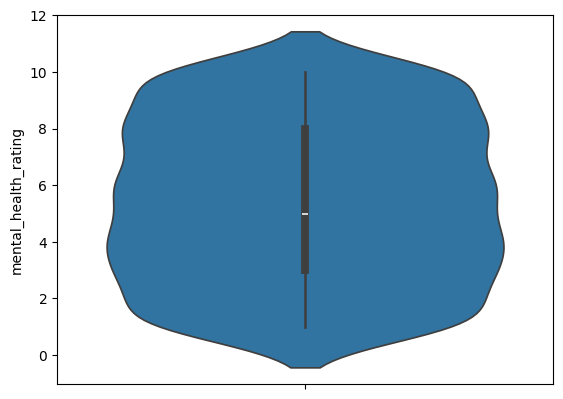

In [74]:
sns.violinplot(shp.mental_health_rating)

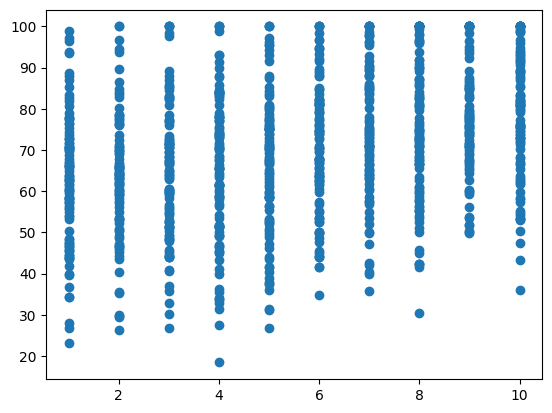

In [75]:
plt.scatter(shp.mental_health_rating, shp.exam_score)

In [76]:
shp_mental = shp[["mental_health_rating","exam_score"]].groupby(by="mental_health_rating").mean().reset_index()

In [77]:
shp_mental.head()

,mental_health_rating,exam_score
0,1,62.370588
1,2,63.417021
2,3,64.475238
3,4,65.685455
4,5,66.769697


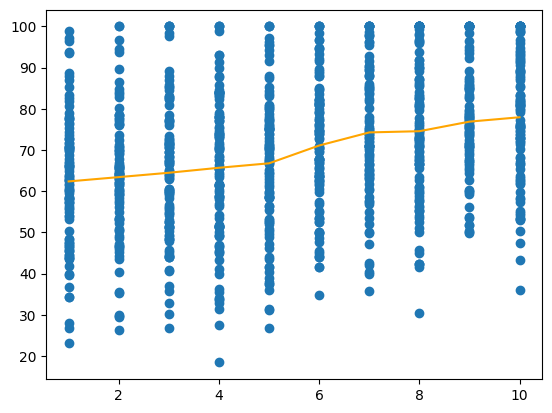

In [78]:
plt.scatter(shp.mental_health_rating, shp.exam_score)
plt.plot(shp_mental.mental_health_rating, shp_mental.exam_score, color='orange')
plt.show()


In [79]:
corr_mental_perf = np.corrcoef(shp.mental_health_rating, shp.exam_score)
print("Correlation de pearson entre mental health and performance: ", corr_mental_perf[0][1])

Correlation de pearson entre mental health and performance:  0.3215229306551462


### 3.3 study_hours_per_day

In [80]:
np.corrcoef(shp.study_hours_per_day, shp.exam_score)

array([[1.        , 0.82541851],
       [0.82541851, 1.        ]])

In [81]:
shp_study_hours = shp[["study_hours_per_day","exam_score"]].groupby(by="study_hours_per_day").mean().reset_index()
shp_study_hours.head()

,study_hours_per_day,exam_score
0,0.0,40.807692
1,0.1,53.400000
2,0.2,31.500000
3,0.3,32.625000
4,0.5,39.525000


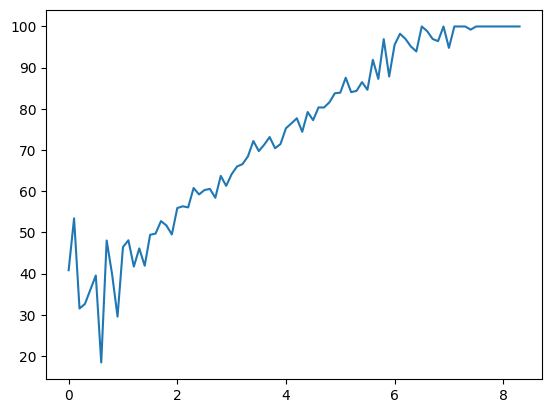

In [82]:
plt.plot(shp_study_hours.study_hours_per_day, shp_study_hours.exam_score)

#### Fits linéaire et sigmoide avec scipy

C:\Users\Administrateur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_9396\1812965948.py:26: OptimizeWarning: Covariance of the parameters could not be estimated
  parameters, covariance = curve_fit(sigmoid_full_fct, xdata, ydata)


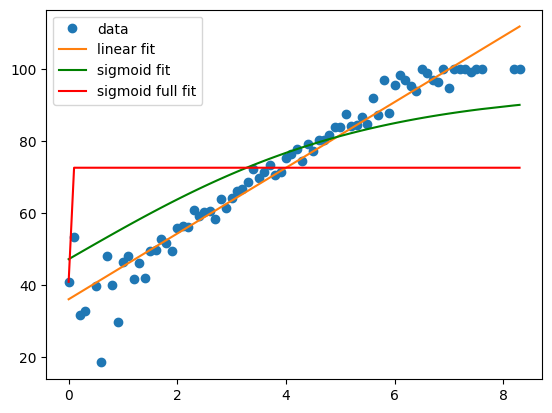

In [83]:
def linear_fct(x, A, B):
    y = A * x + B
    return y

def sigmoid_fct(x, A, B):
    y = A/(1 + np.exp(- B * x))
    return y

def sigmoid_full_fct(x, A, B, C):
    y = A/(1 + np.exp(- B * x)) + C
    return y

xdata = shp_study_hours.study_hours_per_day
ydata = shp_study_hours.exam_score

parameters, covariance = curve_fit(linear_fct, xdata, ydata)
fit_A = parameters[0]
fit_B = parameters[1]
fit_lin_y = linear_fct(xdata, fit_A,fit_B)

parameters, covariance = curve_fit(sigmoid_fct, xdata, ydata)
fit_A = parameters[0]
fit_B = parameters[1]
fit_sigmoid_y = sigmoid_fct(xdata, fit_A,fit_B)

parameters, covariance = curve_fit(sigmoid_full_fct, xdata, ydata)
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_sigmoid_full_y = sigmoid_full_fct(xdata, fit_A,fit_B, fit_C)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_lin_y, '-', label='linear fit')
plt.plot(xdata, fit_sigmoid_y, '-', color = "green", label='sigmoid fit')
plt.plot(xdata, fit_sigmoid_full_y, '-', color = "red", label='sigmoid full fit')
plt.legend()

### Tentative d'amélioration du fit sigmoide après lissage

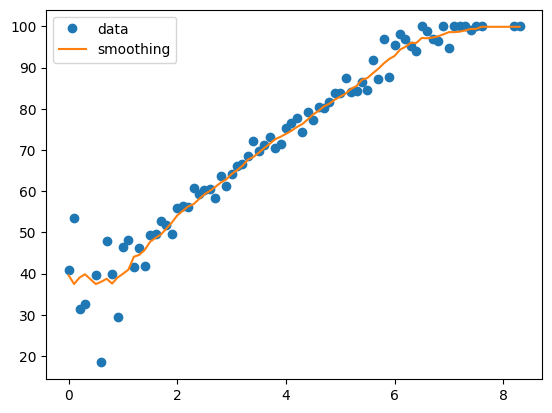

In [84]:
N = 10
y = uniform_filter1d(ydata, size=N)

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, y, '-', label='smoothing')
plt.legend()

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_9396\733964898.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  parameters, covariance = curve_fit(sigmoid_full_fct, xdata, y)


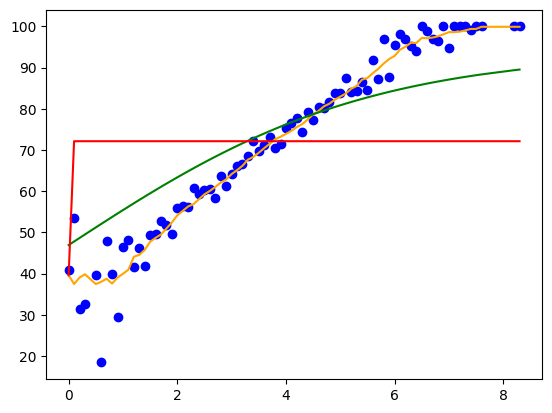

In [85]:
parameters, covariance = curve_fit(sigmoid_fct, xdata, y)
fit_A = parameters[0]
fit_B = parameters[1]
fit_sigmoid_y = sigmoid_fct(xdata, fit_A,fit_B)

parameters, covariance = curve_fit(sigmoid_full_fct, xdata, y)
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_sigmoid_full_y = sigmoid_full_fct(xdata, fit_A,fit_B, fit_C)

plt.plot(xdata, ydata, 'o', color = "blue", label='data')
plt.plot(xdata, y, '-', color = "orange", label='smoothing')
plt.plot(xdata, fit_sigmoid_y, '-', color = "green", label='sigmoid fit')
plt.plot(xdata, fit_sigmoid_full_y, '-', color='red', label='sigmoid full fit')

## 4. Ecriture du dataset modifié avec remplacement des valeurs Nan pour le Machine Learning

In [86]:
shp.to_csv("../transformed\student_habits_performance.csv", index=False)